## Simple Linear Regression

The objective of this notebook is to show you how to apply the algorithm you learnt about in the main task. To start, we will import packages that will help us manipulate data and leverage the easy-to-use machine learning tools from the scikit-learn library. Then, we will load our data into a pandas DataFrame. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [2]:
# Import the data
our_data = pd.read_csv("Salary_Data.csv")
our_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


A linear model describes a linear relationship between an input and output variable. We therefore need to make sure that the problem we are looking to model with Linear Regression indeed has a continuous input and output variable with a linear relationship. 

Below we have a scatter plot of the salary data. We can observe that the more years of experience an employee has, the higher their salary. 
This is a linear relationship that can be estimated with a simple linear relationship. The independent variable (years of experience) is on the x-axis and the dependent variable (salary) is on the y-axis.

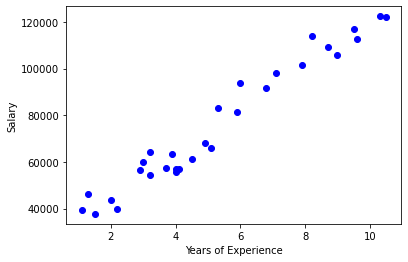

In [6]:
# The iloc function allows use to select rows from the dataframe for plotting.  
x = our_data.iloc[:,:1].values
y = our_data.iloc[:,-1].values

plt.scatter(x,y,color = 'b')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

For comparison, our problem might have no continuous input variables, or the impact of the input on the output variable may not be linear, as in this example:

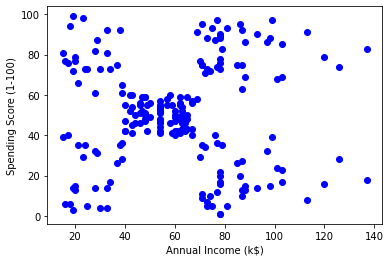

In [7]:
# Plot an example of non-linear data
data_notlin = pd.read_csv('Mall_Customers.csv',index_col=0)

x_notlin = data_notlin.loc[:,'Annual Income (k$)'].values
y_notlin = data_notlin.loc[:,'Spending Score (1-100)'].values

plt.scatter(x_notlin,y_notlin,color = 'b')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Now that we have determined a linear relationship between salary and years of experience, we will fit a simple linear regression model using sklearn.

In [8]:
# Fit the model
salary_model = LinearRegression()
salary_model.fit(x,y)

LinearRegression()

What does it mean that we have fitted a model? It means we can make predictions along a line by inputting any x value. We can see how similar those predictions are to the x values for which we know the corresponding y values. Below these predictions are shown in red, and the observed values are in blue. 

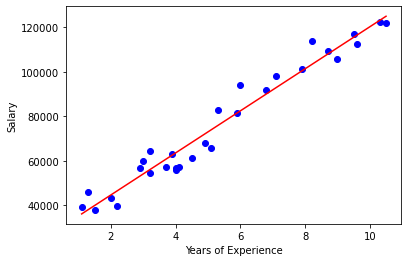

In [9]:
# Plot the data and model
y_pred = salary_model.predict(x)

plt.scatter(x,y,color = 'b')
plt.plot(x,y_pred,color = 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

If we are happy with this model, we can use it to determine how much to pay an employee who has been at the company longer than any other previous employee. In other words, we will extrapolate the linear model to predict a salary outside of the known data.

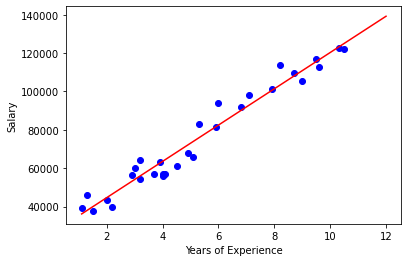

Employee salary should be: [139191.74805613]


In [10]:
# Predict an unknown value
unk_x = [[12]] 

x_pred = np.append(x, unk_x).reshape(-1,1)
y_pred = salary_model.predict(x_pred)

plt.scatter(x,y,color = 'b')
plt.plot(x_pred,y_pred,color = 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

print("Employee salary should be:", salary_model.predict(unk_x))